Title: Investment in renewable energy (World)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext google.colab.data_table


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/investment-in-renewable-energy-by-technology.csv')
df.head()

# Organizing data
df.drop(columns=['Code'], inplace=True)
df.rename(columns={'Entity':'Country'}, inplace=True)
df = df[df['Year'] >= 2015]
df.head()

,Country,Year,Marine energy,Small hydropower,Geothermal energy,Biofuels,Biomass and waste-to-energy,Wind energy,Solar energy
11,World,2015,200000000,4199999700,2500000000,3600000000,10400000000,119700000000,176600000000
12,World,2016,200000000,4300000000,2700000000,2099999900,15200000000,123500000000,145900000000
13,World,2017,200000000,4000000000,2400000000,3300000000,7400000000,133399994000,180800000000
14,World,2018,200000000,2300000000,2500000000,3300000000,11500000000,132700000000,143500000000
15,World,2019,200000000,2500000000,1200000000,3000000000,11200000000,142700000000,141000000000


In [3]:
df_lev = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/levelized-cost-of-energy.csv')
df_lev.head()

# Organize data
df_lev.drop(columns=['Code'], inplace=True)
df_lev.rename(columns={'Entity':'Country'}, inplace=True)
df_lev.rename(columns={'Bioenergy levelized cost of energy':'Bio-energy', 'Geothermal levelized cost of energy':'Geothermal'}, inplace=True)
df_lev.rename(columns={'Offshore wind levelized cost of energy':'Offshore wind', 'Onshore wind levelized cost of energy':'Onshore wind'}, inplace=True)
df_lev.rename(columns={'Concentrated solar power levelized cost of energy':'Concentrated solar', 'Solar photovoltaic levelized cost of energy':'Solar photocvoltaic'}, inplace=True)
df_lev.rename(columns={'Hydropower levelized cost of energy':'Hydropower'}, inplace=True)
df_lev.rename(columns={'Entity':'Country'}, inplace=True)
df_lev = df_lev[df_lev['Year'] >= 2019]
df_lev.head(100)

#df_lev.isnull().sum()

,Country,Year,Bio-energy,Geothermal,Offshore wind,Solar photocvoltaic,Concentrated solar,Hydropower,Onshore wind
10,Argentina,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.066861
11,Argentina,2020,NaN,NaN,NaN,NaN,NaN,NaN,0.074740
12,Argentina,2021,NaN,NaN,NaN,NaN,NaN,NaN,0.072457
13,Argentina,2022,NaN,NaN,NaN,NaN,NaN,NaN,0.053053
14,Argentina,2023,NaN,NaN,NaN,NaN,NaN,NaN,0.088106
...,...,...,...,...,...,...,...,...,...
458,Netherlands,2019,NaN,NaN,NaN,0.104006,NaN,NaN,0.053873
459,Netherlands,2020,NaN,NaN,NaN,0.100650,NaN,NaN,0.040070
460,Netherlands,2021,NaN,NaN,NaN,0.083571,NaN,NaN,0.045292
461,Netherlands,2022,NaN,NaN,NaN,0.091196,NaN,NaN,0.046655


In [7]:
# Grouping by country to get only the world
df_gr=df_lev.copy()
df_gr.head()

df_grouped = df_gr.groupby('Country')
df_world = df_grouped.get_group('World')
df_world.head()
#df_world.columns

,Country,Year,Bio-energy,Geothermal,Offshore wind,Solar photocvoltaic,Concentrated solar,Hydropower,Onshore wind
794,World,2019,0.069156,0.073327,0.093179,0.067467,0.241610,0.045939,0.047995
795,World,2020,0.077995,0.061647,0.088160,0.060086,0.121824,0.050994,0.039882
796,World,2021,0.072303,0.073723,0.079872,0.052133,0.124311,0.053232,0.035502
797,World,2022,0.062921,0.057813,0.079798,0.050495,0.122017,0.061183,0.033652
798,World,2023,0.071544,0.071112,0.074506,0.044247,0.117258,0.057057,0.032578


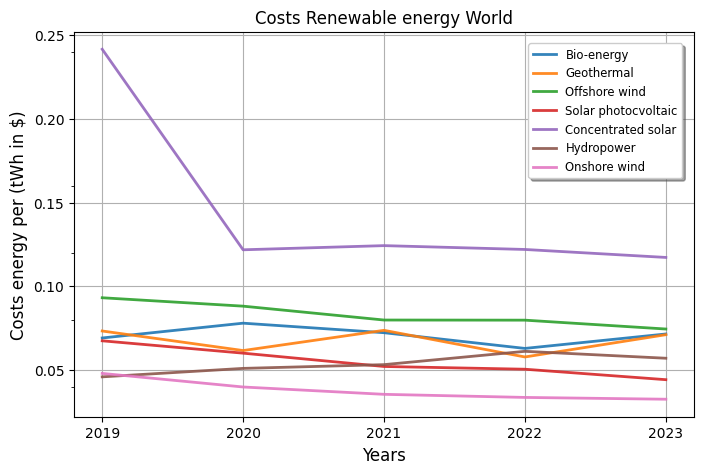

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df=df_world.copy()

df=pd.DataFrame(df)
df.head()

years = ("2019", "2020", "2021", "2022", "2023")
fig, ax = plt.subplots(figsize=(8, 5))

for column in df.columns[2:]:
    ax.plot(years, df[column], label=column, lw=2, alpha=0.9)
ax.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='small', fancybox=True)
ax.set_title('Costs Renewable energy World')
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Costs energy per (tWh in $)', fontsize=12)
ax.grid()
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.04))

plt.show()

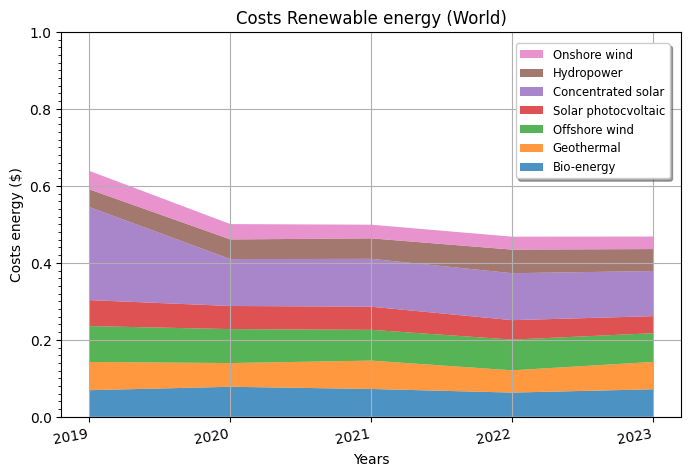

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

years = ("2019", "2020", "2021", "2022", "2023")
world = {
'Bio-energy':[0.06915627, 0.077994786, 0.07230296, 0.06292062, 0.071543775],
'Geothermal':[0.07332711, 0.06164678, 0.07372308, 0.057813246, 0.07111167],
'Offshore wind':[0.0931793, 0.08816005, 0.07987241, 0.07979848, 0.07450562],
'Solar photocvoltaic':[0.06746652, 0.060086135, 0.060086135, 0.05049542, 0.044247407],
'Concentrated solar':[0.24160981, 0.12182434, 0.124310926, 0.122017, 0.117257856],
'Hydropower': [0.045938633, 0.050994493, 0.05323211, 0.061183166, 0.057056986],
'Onshore wind':[0.047994845, 0.039881755, 0.035502348, 0.033651832, 0.032578353]
          }

fig, ax = plt.subplots(figsize=(8, 5))
ax.stackplot(years, world.values(),labels=world.keys(), alpha=0.8)
ax.legend(loc='upper right', borderaxespad=1, fontsize='small', shadow=True, fancybox=True, reverse=True)
ax.set_title('Costs Renewable energy (World)')
ax.set_xlabel('Years')
ax.set_ylabel('Costs energy ($)')
ax.set_ylim(0, 1)
ax.grid()
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.02))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=10, horizontalalignment='right')

plt.show()